In [1]:
from IPython.core.display import display
import preprocessing
import ember_net
import plots
import evaluation
import adverserial_gen
import os
import gc
import torch
import torch.optim as optim
import torch.nn.functional as F
import tqdm
from torchinfo import summary
import time

In [20]:
# run this if you made some changes in the python files while notebook kerel was running
import importlib
importlib.reload(preprocessing)
importlib.reload(ember_net)
importlib.reload(plots)
importlib.reload(evaluation)
importlib.reload(adverserial_gen)


<module 'evaluation' from '/src/final_project_git/evaluation.py'>

In [19]:
compute_mode = 'gpu'

if compute_mode == 'cpu':
    device = torch.device('cpu')
elif compute_mode == 'gpu' and torch.cuda.is_available():
    # If you are using pytorch on the GPU cluster, you have to manually specify which GPU device to use
    # It is extremely important that you *do not* spawn multi-GPU jobs.
    os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
    os.environ["CUDA_VISIBLE_DEVICES"] = '0'    # Set device ID here
    device = torch.device('cuda')
else:
    raise ValueError('Unrecognized compute mode')

In [4]:
# some meta parameters
lr = 0.001
batch_size = 100
path = 'model/EmberNet2'

In [5]:
# load the data and put it into a pytorch dataloader.
# You can set debug_fragment to a float between 0 and 1 to only use a fraction of the data for debugging
train_loader, val_loader, adv_loader, test_loader, scaler = \
    preprocessing.pipeline("ember2018" , 'model/', batch_size = batch_size, debug_fragment = None, collect_hashes=False, vectorize=False)

Reading 600000 samples from training set 
Reading 200000 samples from test set
Samples in training set: 539400
Samples in validation set: 60000
Samples in adverserial set: 600
Samples in test set: 200000 


In [6]:
# initialize the model and optimizer
model = ember_net.EmberNet(device, scaler)
summary(model, (batch_size, 1, 2381))
opt = optim.Adam(model.parameters(), lr=lr,amsgrad=True) 

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv1d: 1-1                            [100, 128, 37]            8,320
├─BatchNorm1d: 1-2                       [100, 128, 37]            256
├─Dropout: 1-3                           [100, 128, 37]            --
├─Conv1d: 1-4                            [100, 128, 18]            49,280
├─BatchNorm1d: 1-5                       [100, 128, 18]            256
├─Dropout: 1-6                           [100, 128, 18]            --
├─Linear: 1-7                            [100, 256]                590,080
├─BatchNorm1d: 1-8                       [100, 256]                512
├─Dropout: 1-9                           [100, 256]                --
├─Linear: 1-10                           [100, 32]                 8,224
├─BatchNorm1d: 1-11                      [100, 32]                 64
├─Linear: 1-12                           [100, 2]                  66
Total params: 657,058
Trainable params: 657,058
Non-trainable param

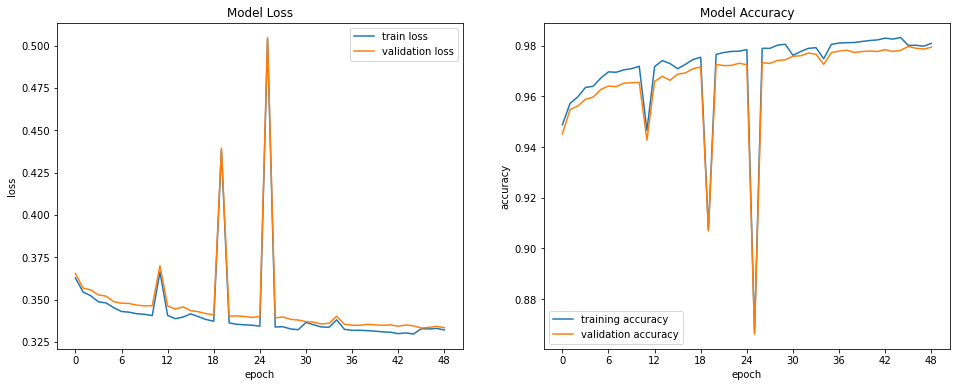

In [7]:
# only execute this cell if you want to load a pretrained model.
# you can continue training on a pretrained model or just evaluate the model
# the saved model should have been trained with the same model architecture as "model"!
model.load(path)
model.plot()

In [ ]:
# execute this cell to train the model. Note that the paths to save the model will be overwritten
# you can reevaluate the cell to continue training on the model which is in memory
model.fit(epochs=1, loss_func= F.cross_entropy, opt=opt, train_dl=train_loader, valid_dl=val_loader, save_path='model/tmp')
model.save(path)

In [8]:
start_time = time.time()
model.test(F.cross_entropy, test_loader)
end_time = time.time()

print ('Prediction Time',round(end_time-start_time,2) )

Test Loss= 0.35084766149520874	 Test Accuracy= 0.96146
Prediction Time 7.24


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.3371667265892029	 Adverserial Accuracy= 0.974025974025974


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.5720379948616028	 Adverserial Accuracy= 0.737012987012987


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.6741222143173218	 Adverserial Accuracy= 0.6298701298701299


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.7671006321907043	 Adverserial Accuracy= 0.5194805194805194


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.8488824963569641	 Adverserial Accuracy= 0.43506493506493504


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.8938707709312439	 Adverserial Accuracy= 0.4155844155844156


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.9024728536605835	 Adverserial Accuracy= 0.39935064935064934


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.9102767109870911	 Adverserial Accuracy= 0.38961038961038963


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.9318376779556274	 Adverserial Accuracy= 0.36038961038961037


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.9497857093811035	 Adverserial Accuracy= 0.3538961038961039


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.33283987641334534	 Adverserial Accuracy= 0.98


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.48877397179603577	 Adverserial Accuracy= 0.8216666666666667


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.572946310043335	 Adverserial Accuracy= 0.735


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.645402729511261	 Adverserial Accuracy= 0.6466666666666666


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.7191003561019897	 Adverserial Accuracy= 0.5733333333333334


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.7784690260887146	 Adverserial Accuracy= 0.5266666666666666


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.7949872016906738	 Adverserial Accuracy= 0.5066666666666667


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.8092592358589172	 Adverserial Accuracy= 0.49


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.8393617868423462	 Adverserial Accuracy= 0.45666666666666667


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.862472653388977	 Adverserial Accuracy= 0.43666666666666665


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 0.33283987641334534	 Adverserial Accuracy= 0.98


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 1.225756287574768	 Adverserial Accuracy= 0.08


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 1.282132625579834	 Adverserial Accuracy= 0.028333333333333332


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 1.2814604043960571	 Adverserial Accuracy= 0.03


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 1.2771285772323608	 Adverserial Accuracy= 0.03333333333333333


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 1.2546805143356323	 Adverserial Accuracy= 0.056666666666666664


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 1.2494330406188965	 Adverserial Accuracy= 0.065


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 1.2447587251663208	 Adverserial Accuracy= 0.065


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 1.2305291891098022	 Adverserial Accuracy= 0.08166666666666667


  0%|          | 0/6 [00:00<?, ?it/s]

Original Loss= 0.33283987641334534	 Original Accuracy= 0.98	 Adverserial Loss= 1.220386028289795	 Adverserial Accuracy= 0.085


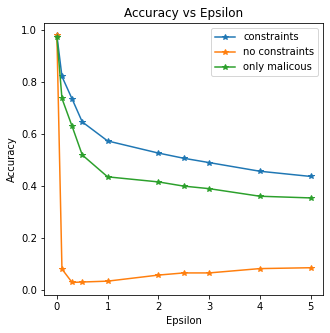

In [9]:
epsilons = [0,0.1,0.3,0.5,1,2,2.5,3,4,5]
accuracies_mask = []
accuracies = []
accuracies_mal = []
examples_mask = []
examples = []

for eps in tqdm.auto.tqdm(epsilons):
    gc.collect()
    if compute_mode=="gpu":
        torch.cuda.empty_cache()
    _, acc = model.attack(F.cross_entropy, eps, adv_loader, constraints=True, malicous_only=True)
    accuracies_mal.append(acc)

for eps in tqdm.auto.tqdm(epsilons):
    gc.collect()
    if compute_mode=="gpu":
        torch.cuda.empty_cache()
    example, acc = model.attack(F.cross_entropy, eps, adv_loader, constraints=True)
    accuracies_mask.append(acc)
    examples_mask.append(example)

for eps in tqdm.auto.tqdm(epsilons):
    gc.collect()
    if compute_mode=="gpu":
        torch.cuda.empty_cache()
    example, acc = model.attack(F.cross_entropy, eps, adv_loader)
    accuracies.append(acc)
    examples.append(example)
    
plots.plot_eps_acc(epsilons, accuracies_mask, accuracies, accuracies_mal)

In [10]:
norms_mask = evaluation.norms(examples_mask)
norms_no_mask = evaluation.norms(examples)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

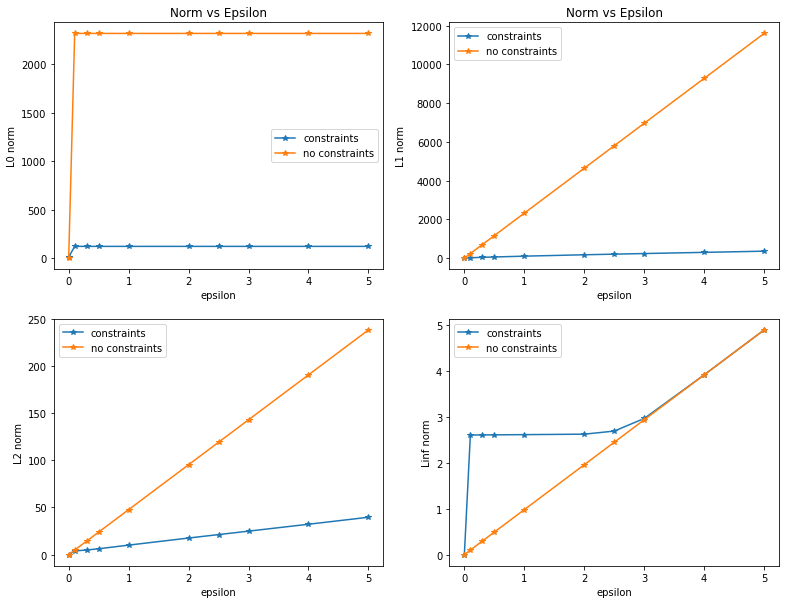

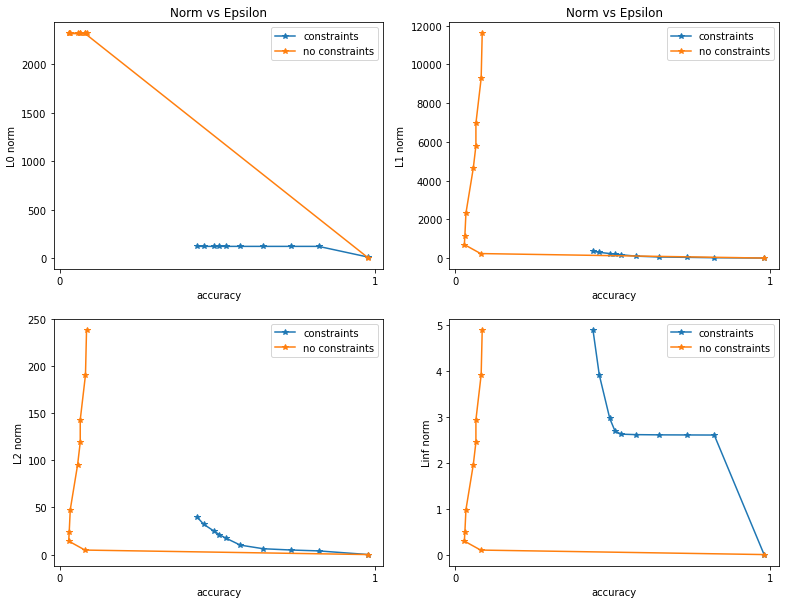

In [11]:
plots.plot_norm(epsilons, epsilons, norms_mask, norms_no_mask, "epsilon", ["constraints", "no constraints"])
plots.plot_norm(accuracies_mask, accuracies, norms_mask, norms_no_mask, "accuracy", ["constraints", "no constraints"])

In [12]:
eps_index = 9

In [13]:
benign, malicious, percentages = evaluation.calculate_shares(examples_mask[eps_index])
df_absolute, df_percentage = evaluation.create_dfs_swaps(benign, malicious, percentages)
display(df_absolute)
display(df_percentage)

,Meaning,Field in list,no of samples
0,original benign,benign[0],292
1,original benign & predicted benign,benign[1],288
2,original benign & predicted benign & attack predicted benign,benign[3],153
3,original benign & predicted benign & attack predicted malicious,malicious[3],135
4,original benign & predicted malicious,malicious[1],4
5,original benign & predicted malicious & attack predicted benign,benign[4],0
6,original benign & predicted malicious & attack predicted malicious,malicious[4],4
7,original malicious,malicious[0],308
8,original malicious & predicted benign,benign[2],8
9,original malicious & predicted benign & attack predicted benign,benign[5],8


,Proportion of samples which are,among samples which are,percentage
0,predicted benign,original benign,98.63
1,predicted malicious,original benign,1.37
2,predicted benign,original malicious,2.60
3,predicted malicious,original malicious,97.40
4,attack predicted benign,original benign & predicted benign,53.12
5,attack predicted malicious,original benign & predicted benign,46.88
6,attack predicted benign,original benign & predicted malicious,0.00
7,attack predicted malicious,original benign & predicted malicious,100.00
8,attack predicted benign,original malicious & predicted benign,100.00
9,attack predicted malicious,original malicious & predicted benign,0.00


In [21]:
print(accuracies_mask[eps_index])
json_features = adverserial_gen.adv_examples_to_json(examples_mask[eps_index],"ember2018",model.scaler)
adverserial_gen.save_adv_raw('adv_samples/',json_features)



0.43666666666666665
extracting hashes and rescaling
loading raw files
perturb raw files
